In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import os

In [2]:
# load age key
# root = "/media/nick/hdd02/Cole Trapnell's Lab Dropbox/Nick Lammers/Nick/morphseq/"
root = "/net/trapnell/vol1/home/nlammers/projects/data/morphseq/"
metadata_path = os.path.join(root, "metadata")
age_key_df = pd.read_csv(os.path.join(metadata_path, "age_key_df.csv"), index_col=0)

# remove rows and add variables
morph_experiments = []#"20230830", "20230831", "20231207", "20231208"]
ref_experiments = ["20231218", "20240307", "202340411"]
# generate an absolute referemce
# eid_vec = np.asarray([snip[:12] for snip in age_key_df["snip_id"]])
# date_vec = np.asarray([snip[:8] for snip in age_key_df["snip_id"]])
# age_key_df["embryo_id"] = eid_vec
# age_key_df["experiment_date"] = date_vec
eid_vec = age_key_df["embryo_id"].to_numpy()
eid_index = np.unique(eid_vec)
age_key_df["abs_stage_hpf"] = np.nan

for eid in eid_index:
    abs_time_vec = age_key_df.loc[eid_vec==eid, "abs_time_hr"].to_numpy()
    pd_stage_vec = age_key_df.loc[eid_vec==eid, "inferred_stage_hpf_reg"].to_numpy()
    age_key_df.loc[eid_vec==eid, "abs_stage_hpf"] = pd_stage_vec[0] + abs_time_vec

    
age_key_df["experiment_date"] = age_key_df["experiment_date"].astype(str)
keep_flags = np.asarray([True if age_key_df.loc[i, "experiment_date"] not in morph_experiments
                         else False for i in age_key_df.index])


age_key_df = age_key_df.loc[keep_flags, :]

ref_flags = np.asarray([True if age_key_df.loc[i, "experiment_date"] in ref_experiments
                         else False for i in age_key_df.index])
age_key_df.head(5)

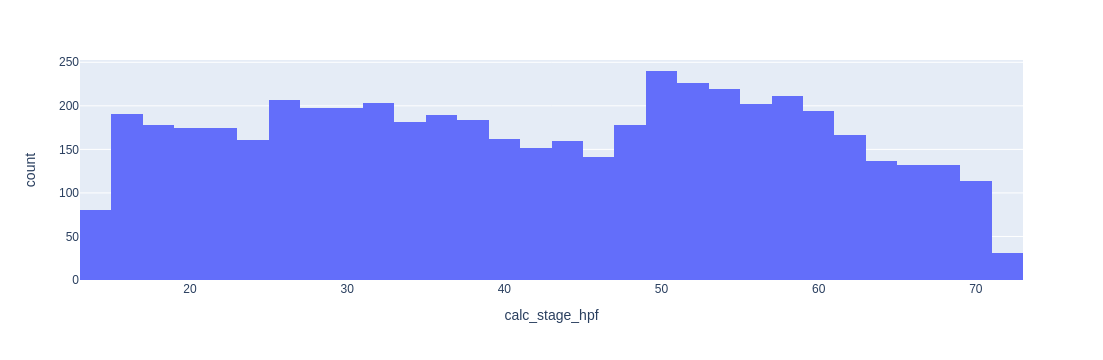

In [3]:
px.histogram(age_key_df.loc[ref_flags], x="calc_stage_hpf")

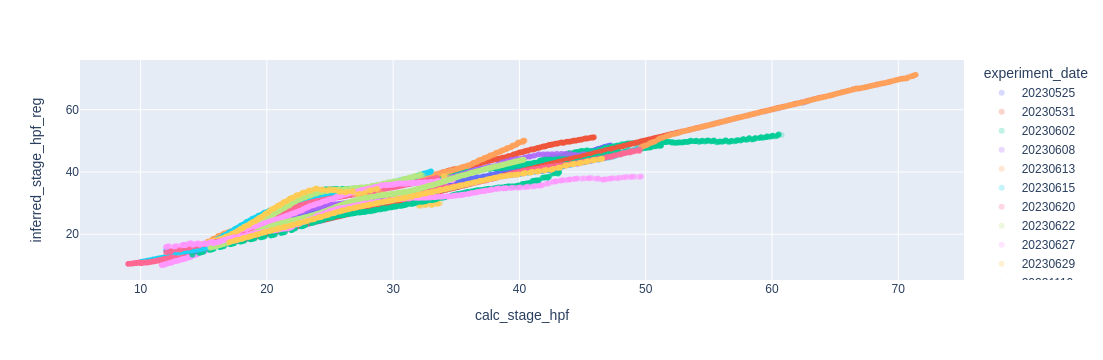

In [4]:
fig = px.scatter(age_key_df, x="calc_stage_hpf", y="inferred_stage_hpf_reg",opacity=0.25,
                 color="experiment_date", template="plotly")
fig.show()

In [24]:
age_key_df_alt = pd.read_csv(os.path.join(metadata_path, "age_key_df.csv"), index_col=0)
age_key_df_alt = age_key_df_alt.loc[~keep_flags, :]
age_key_df_alt.tail(50)

snip_id  calc_stage_hpf  inferred_stage_hpf  \
34520  20231207_G03_e00_t0000       48.068562           45.107481   
34521  20231207_G04_e00_t0000       24.078819           30.526677   
34522  20231207_H02_e00_t0000       48.020716           45.062583   
34523  20231207_H03_e00_t0000       48.071970           45.110679   
34524  20231207_H04_e00_t0000       24.075373           30.523174   
34525  20231208_A01_e00_t0000       60.000000           54.245213   
34526  20231208_A02_e00_t0000       60.048671           54.289216   
34527  20231208_A03_e00_t0000       60.051912           54.292146   
34528  20231208_A04_e00_t0000       60.097439           54.333307   
34529  20231208_A05_e00_t0000       60.100651           54.336211   
34530  20231208_A06_e00_t0000       48.149395           55.942461   
34531  20231208_A12_e00_t0000       60.273481           54.492464   
34532  20231208_B01_e00_t0000       60.003259           54.248159   
34533  20231208_B02_e00_t0000       60.045432           54.286287   
34534  20231208_B03_e00_t0000       60.055188           54.295108   
34535  20231208_B04_e00_t0000       60.094180           54.330360   
34536  20231208_B05_e00_t0000       60.103894           54.339143   
34537  20231208_B06_e00_t0000       48.146150           55.938692   
34538  20231208_C01_e00_t0000       60.006523           54.251110   
34539  20231208_C04_e00_t0000       60.090936           54.327427   
34540  20231208_C05_e00_t0000       60.107126           54.342065   
34541  20231208_C06_e00_t0000       48.142890           55.934904   
34542  20231208_D01_e00_t0000       60.009771           54.254047   
34543  20231208_D02_e00_t0000       60.038914           54.280395   
34544  20231208_D03_e00_t0000       60.061689           54.300986   
34545  20231208_D04_e00_t0000       60.087693           54.324495   
34546  20231208_D05_e00_t0000       60.110422           54.345044   
34547  20231208_D06_e00_t0000       48.139645           56.017663   
34548  20231208_E02_e00_t0000       60.035675           54.277467   
34549  20231208_E03_e00_t0000       60.064943           54.303927   
34550  20231208_E05_e00_t0000       60.113668           54.347979   
34551  20231208_E06_e00_t0000       48.136403           56.018081   
34552  20231208_F01_e00_t0000       60.016260           54.259913   
34553  20231208_F02_e00_t0000       60.032427           54.274530   
34554  20231208_F03_e00_t0000       60.068182           54.306856   
34555  20231208_F04_e00_t0000       60.084377           54.321498   
34556  20231208_F05_e00_t0000       60.116918           54.350917   
34557  20231208_F06_e00_t0000       48.133173           56.003525   
34558  20231208_G01_e00_t0000       60.019506           54.262848   
34559  20231208_G02_e00_t0000       60.029179           54.271594   
34560  20231208_G03_e00_t0000       60.071430           54.309792   
34561  20231208_G04_e00_t0000       60.081135           54.318566   
34562  20231208_G05_e00_t0000       60.120175           54.353862   
34563  20231208_G06_e00_t0000       48.129907           55.999725   
34564  20231208_H01_e00_t0000       60.022731           54.265764   
34565  20231208_H02_e00_t0000       60.025935           54.268660   
34566  20231208_H03_e00_t0000       60.074671           54.312722   
34567  20231208_H04_e00_t0000       60.077896           54.315638   
34568  20231208_H05_e00_t0000       60.123418           54.356794   
34569  20231208_H06_e00_t0000       48.126629           55.995911   

       abs_time_hr       train_dir                        model_name  \
34520     0.107128  20240204_ds_v2  VAE_training_2024-02-04_13-54-24   
34521     0.123154  20240204_ds_v2  VAE_training_2024-02-04_13-54-24   
34522     0.032369  20240204_ds_v2  VAE_training_2024-02-04_13-54-24   
34523     0.112453  20240204_ds_v2  VAE_training_2024-02-04_13-54-24   
34524     0.117770  20240204_ds_v2  VAE_training_2024-02-04_13-54-24   
34525     0.000000  20240204_ds_v2  VAE_training_2024-02-04_13-54-24  